In [1]:
# importining libraries
import pandas as pd
import matplotlib.pyplot as plt

## Read in all files and review basic information

In [2]:
orders = pd.read_csv('FileLocation/instacart_orders.csv', sep=';')

orders.info()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
products = pd.read_csv('FileLocation/products.csv', sep=';')
products.info()
display(products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
aisles = pd.read_csv('FileLocation/aisles.csv', sep=';')
aisles.info()
display(aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments = pd.read_csv('FileLocation/departments.csv', sep=';')
departments.info()
display(departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
order_products = pd.read_csv('FileLocation/order_products.csv', sep=';')
order_products.info(show_counts=True)
display(order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [8]:
# Check for all orders placed Wednesday at 2:00 AM

# assuming 0 = Sunday and 6 = Saturday from order_dow and order_hour_of_day is in 24 hour sequence,
# filter for 3 from order_dow and 2 from order_hour_of_day

display(orders[(orders['order_dow'] == 3) &
        (orders['order_hour_of_day'] == 2)])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [9]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [10]:
# Double check for duplicate rows
print(orders.duplicated().sum())

0


In [11]:
# Double check for duplicate order IDs only
print(orders['order_id'].duplicated().sum())

0


### `products` data frame

In [12]:
# Check for fully duplicate rows
print(products.duplicated().sum())

0


In [13]:
# Check for just duplicate product IDs
print(products['product_id'].duplicated().sum())

0


In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['prod_lower'] = products['product_name'].str.lower()
products[products['product_name'].str.lower().duplicated()]

,product_id,product_name,aisle_id,department_id,prod_lower
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
436,437,NaN,100,21,NaN
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


In [15]:
# Check for duplicate product names that aren't missing
products[~(products['prod_lower'].isna()) & (
    products['prod_lower'].duplicated())]

,product_id,product_name,aisle_id,department_id,prod_lower
2058,2059,Biotin 1000 Mcg,47,11,biotin 1000 mcg
5455,5456,Green Tea With Ginseng and Honey,96,20,green tea with ginseng and honey
5558,5559,Cream Of Mushroom Soup,69,15,cream of mushroom soup
7558,7559,Cinnamon Rolls with Icing,105,13,cinnamon rolls with icing
9037,9038,American Cheese slices,21,16,american cheese slices
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


### `departments` data frame

In [16]:
# checking for duplicate department (in lower case to ensure)
departments['department'].str.lower().duplicated().sum()

0

In [17]:
# checking for duplicate department_id
departments['department_id'].duplicated().sum()

0

### `aisles` data frame

In [18]:
# checking for duplicate aisle (in lower case to ensure)
aisles['aisle'].str.lower().duplicated().sum()

0

In [19]:
# checking for aisles_id
aisles['aisle_id'].duplicated().sum()

0

### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [21]:
# Double check for any other tricky duplicates
print(order_products[order_products.duplicated(
    subset=['order_id', 'product_id'], keep=False)])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


## Find and remove missing values


### `products` data frame

In [22]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
 4   prod_lower     48436 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.9+ MB


In [23]:
# Are all of the missing product names associated with aisle ID 100?
products[products['product_name'].isna()].groupby('aisle_id').size()

aisle_id
100    1258
dtype: int64

In [24]:
# Are all of the missing product names associated with department ID 21?
products[products['product_name'].isna()].groupby('department_id').size()

department_id
21    1258
dtype: int64

In [25]:
# What is this ailse and department?
display(aisles[aisles['aisle_id'] == 100])
display(departments[departments['department_id'] == 21])

# both aisle and department name is missing

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


In [26]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unkown', inplace=True)

# check via printing info() and sum of isna() to ensure there is no none value in product_name
products.info()
print()
print(products['product_name'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
 4   prod_lower     48436 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.9+ MB

0


### `orders` data frame

In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [28]:
# Are there any missing values where it's not a customer's first order?

not_first_orders = orders[orders['days_since_prior_order'].notna()]
null_columns = not_first_orders.columns[not_first_orders.isnull().any()]

not_first_orders.info()
print()
print(null_columns)

# There are no missing values for non-first orders

<class 'pandas.core.frame.DataFrame'>
Index: 450135 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                450135 non-null  int64  
 1   user_id                 450135 non-null  int64  
 2   order_number            450135 non-null  int64  
 3   order_dow               450135 non-null  int64  
 4   order_hour_of_day       450135 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 24.0 MB

Index([], dtype='object')


### `order_products` data frame

In [29]:
display(order_products.head())
display(order_products.describe())
print()
order_products.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [30]:
# What are the min and max values in 'add_to_cart_order' column?

print("Max value of 'add_to_cart_order: ",
      order_products['add_to_cart_order'].max())
print("Min value of 'add_to_cart_order: ",
      order_products['add_to_cart_order'].min())

Max value of 'add_to_cart_order:  64.0
Min value of 'add_to_cart_order:  1.0


In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
miss_ATC_orderID = order_products[order_products['add_to_cart_order'].isna()]

# Check for duplicates in order_id column - there are 836 duplicates in order_id when'add_to_cart_order' = NA
print("duplicates in order_id column:",
      miss_ATC_orderID['order_id'].duplicated().count())

# Check for duplicates in product_id column  - there are 836 duplicates in order_id when'add_to_cart_order' = NA
print("duplicates in product_id column:",
      miss_ATC_orderID['product_id'].duplicated().count())

# However, individual duplicates of product_id and order_id can be there because a 2 different order can contain same product and vice versa.
# What's really meaningful would be to see if there are any order_id with product_id
print("duplicate of order_id with duplicate product_id:",
      miss_ATC_orderID[miss_ATC_orderID.duplicated(subset=['order_id', 'product_id'])].count())

# check for duplicates in
print()
display(miss_ATC_orderID)
print()
display(miss_ATC_orderID.info())

duplicates in order_id column: 836
duplicates in product_id column: 836
duplicate of order_id with duplicate product_id: order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64



,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0



<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 737 to 4535739
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           836 non-null    int64  
 1   product_id         836 non-null    int64  
 2   add_to_cart_order  0 non-null      float64
 3   reordered          836 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 32.7 KB


None

In [32]:
# Do all orders with missing values have more than 64 products?
max_products_per_order = miss_ATC_orderID.groupby('order_id').size()
print("All orders with missing values which have more than 64 products: ",
      (max_products_per_order > 64).sum())

All orders with missing values which have more than 64 products:  0


In [33]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(
    999).astype(int)

order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
print(sorted(orders['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [35]:
print(sorted(orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


### [A2] What time of day do people shop for groceries?

Most people shop for the groceries the most between 10AM - 2PM


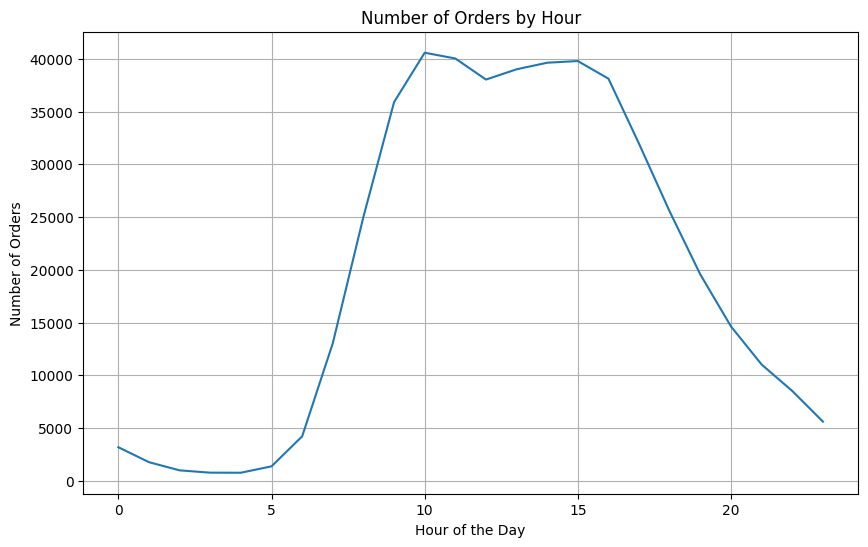

In [36]:
print("Most people shop for the groceries the most between 10AM - 2PM")
orders['order_hour_of_day'].value_counts().sort_index().plot(
    kind='line',
    figsize=(10, 6),
    xlabel='Hour of the Day',
    ylabel='Number of Orders',
    grid=True,
    title='Number of Orders by Hour')
plt.show()

### [A3] What day of the week do people shop for groceries?

Assuming 0 = Sunday, people shop the most on Sundays


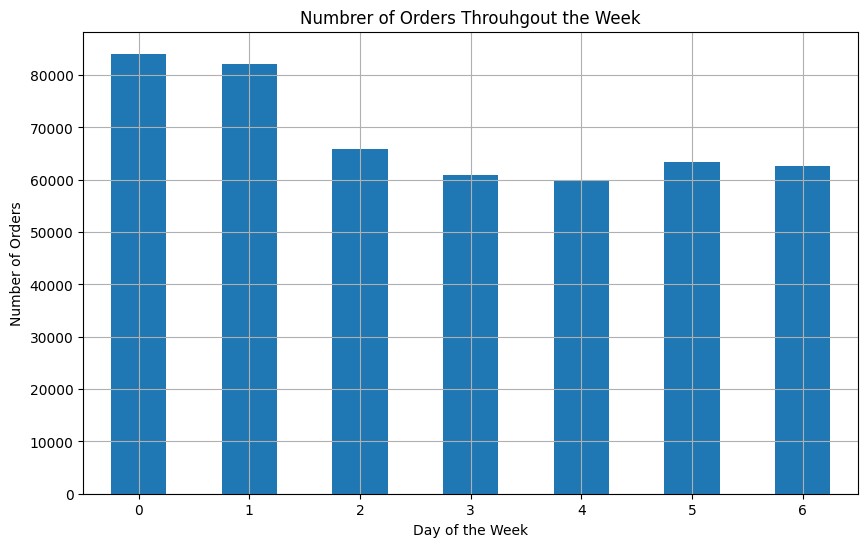

In [61]:
print("Assuming 0 = Sunday, people shop the most on Sundays")
orders['order_dow'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(10, 6),
    xlabel='Day of the Week',
    ylabel='Number of Orders',
    grid=True,
    title='Numbrer of Orders Throuhgout the Week')
plt.xticks(rotation=0)
plt.show()

### [A4] How long do people wait until placing another order?

In [38]:
#display summarized distribution of the order_products dataframe:
display(order_products.describe())

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.545007e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.533887e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,1.518562e+01,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,9.990000e+02,1.000000e+00


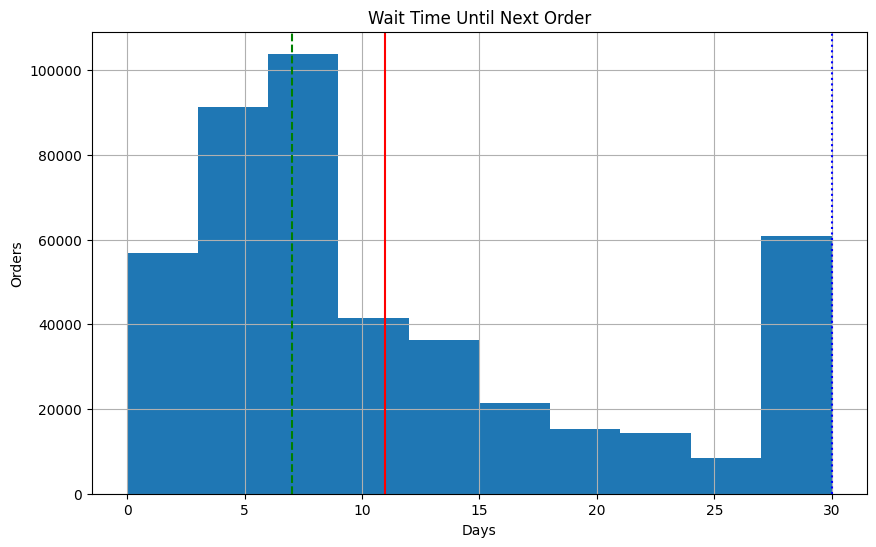

In [63]:
# calculate the mean, median, and mode of wait time before next order
mean_value = int(orders['days_since_prior_order'].mean())
median_value = int(orders['days_since_prior_order'].median())
mode_value = int(orders['days_since_prior_order'].mode().iloc[0])

# plot histogram to show the wait time until next order
orders['days_since_prior_order'].plot(
    kind='hist',
    figsize=(10, 6),
    xlabel='Days',
    ylabel='Orders',
    grid=True,
    title='Wait Time Until Next Order')

# differentiate the lines for mean, median, and mode
plt.axvline(x=mean_value, linestyle='solid', color='red')
plt.axvline(x=median_value, linestyle='dashed', color='green')
plt.axvline(x=mode_value, linestyle='dotted', color='blue')
plt.show()

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [40]:
# assuming 0 = Sunday, 1 = Monday, 2 = Tuesday, 3 = Wednesday...

orders_pivot = orders.pivot_table(orders,
                                  index='order_dow',
                                  aggfunc='count')

display(orders_pivot)
print()
display(orders.head())

,days_since_prior_order,order_hour_of_day,order_id,order_number,user_id
order_dow,,,,,
0,78749,84090,84090,84090,84090
1,77269,82185,82185,82185,82185
2,61925,65833,65833,65833,65833
3,57271,60897,60897,60897,60897
4,56395,59810,59810,59810,59810
5,59907,63488,63488,63488,63488
6,58619,62649,62649,62649,62649


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<Axes: title={'center': 'Wednesday Orders'}, xlabel='Hour of Day', ylabel='Orders'>

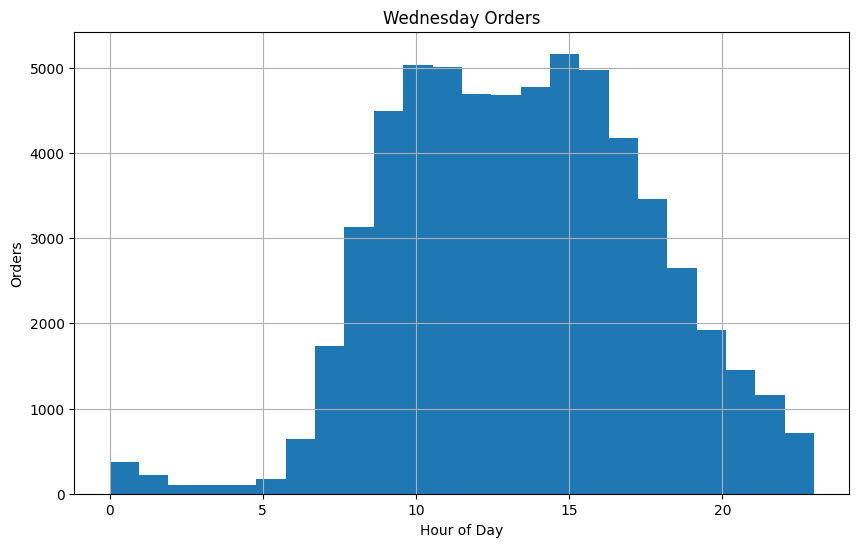

In [41]:
wed_order = orders[orders['order_dow'] == 3]

wed_order['order_hour_of_day'].plot(kind='hist',
                                    figsize=(10, 6),
                                    grid=True,
                                    xlabel='Hour of Day',
                                    ylabel='Orders',
                                    bins=24,
                                    title='Wednesday Orders')

<Axes: title={'center': 'Saturday Orders'}, xlabel='Hour of Day', ylabel='Orders'>

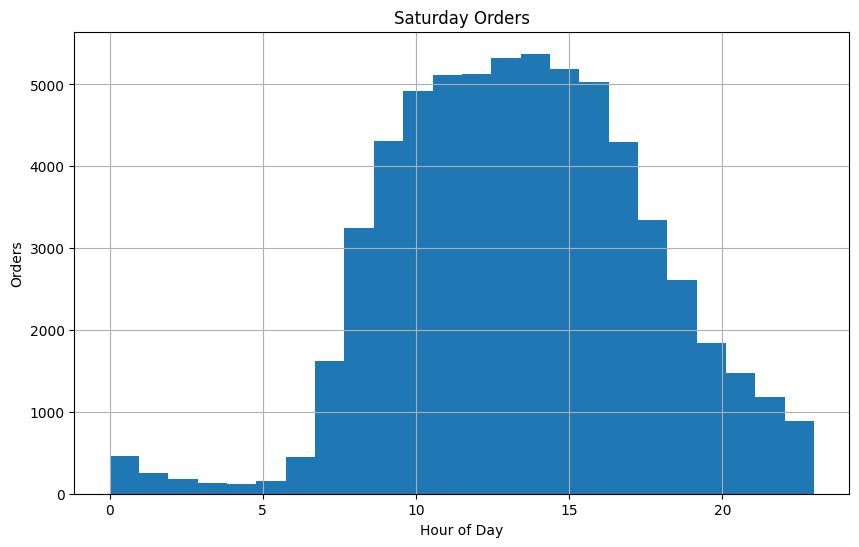

In [42]:
sat_order = orders[orders['order_dow']==6]

sat_order['order_hour_of_day'].plot(kind='hist',
                                    figsize=(10, 6),
                                    grid=True,
                                   bins = 24, 
                                   xlabel = 'Hour of Day',
                                   ylabel = 'Orders',
                                   title='Saturday Orders')

<div class="alert alert-info">  Observation: As in diagram 'Number of Orders by Hour' shows, most customers shop between 10 AM - 3PM. There are slight variation depending on the day of the week, but when Wednesday and Saturday is taken as sample, 10AM - 3PM still shows as most popular timeframe to shop. </div>

### [B2] What's the distribution for the number of orders per customer?

In [43]:
# Calculate the number of orders per customer
# group the orders table by user_id and count the number of orders by counting order_id
order_per_customer = orders.groupby('user_id')['order_id'].count()

<Axes: title={'center': 'Distribution of Orders per Customer'}, xlabel='Number of Orders', ylabel='Frequency'>

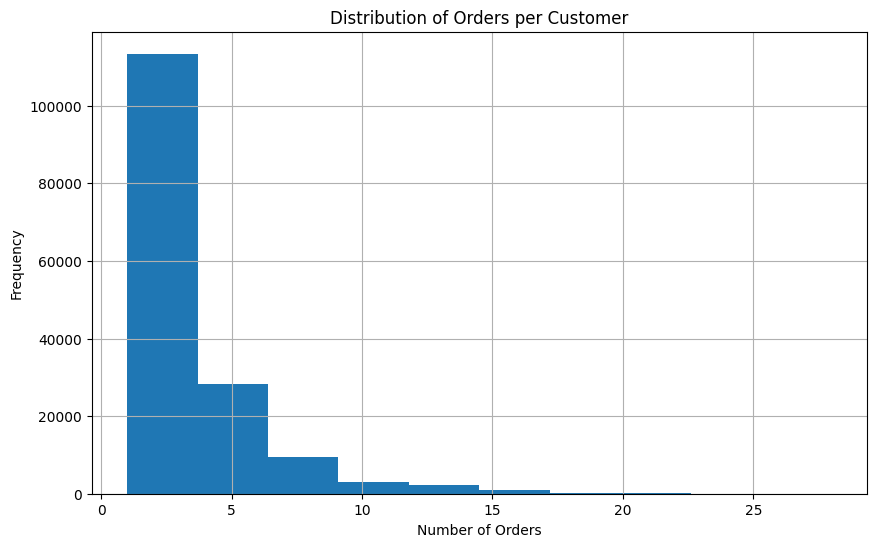

In [44]:
# visualize order_per_customer above
order_per_customer.plot(kind='hist',
                        figsize=(10, 6),
                        grid=True,
                        xlabel='Number of Orders',
                        title='Distribution of Orders per Customer')

<div class="alert alert-info"> Observation: Most customers order less than 5 times. </div>

### [B3] What are the top 20 popular products (display their id and name)?

In [45]:
# merge orders and order_products
orders_order_products = orders.merge(order_products, on='order_id')

In [46]:
# merge orders_order_products and products
oror_products = orders_order_products.merge(products, on='product_id')

display(oror_products.head())
print()
oror_products.info()
print()
print(type(oror_products))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prod_lower
0,1515936,183418,11,6,13,30.0,19048,1,1,Organic Butternut Squash,83,4,organic butternut squash
1,787445,25685,1,6,18,NaN,19048,16,0,Organic Butternut Squash,83,4,organic butternut squash
2,1646929,205815,37,5,13,8.0,19048,11,0,Organic Butternut Squash,83,4,organic butternut squash
3,276490,1004,24,1,12,11.0,19048,1,1,Organic Butternut Squash,83,4,organic butternut squash
4,1300214,33481,7,5,9,6.0,19048,9,1,Organic Butternut Squash,83,4,organic butternut squash



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int32  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prod_lower              object 
dtypes: float64(1), int32(1), int64(9), object(2)
memory usage: 433.4+ MB

<class 'pandas.core.frame.DataFrame'>


In [47]:
# Group merged table and count number of order_id. Store count of unique order_id into num_orders
pop_products = oror_products.groupby(['product_id', 'product_name'])[
    'order_id'].nunique().reset_index()
pop_products.columns = ['product_id', 'product_name', 'num_orders']

# sort the pop_products by num_orders desc
pop_products = pop_products.sort_values(by='num_orders', ascending=False)

display(pop_products.head(20))

,product_id,product_name,num_orders
22808,24852,Banana,66050
12025,13176,Bag of Organic Bananas,53297
19370,21137,Organic Strawberries,37039
20077,21903,Organic Baby Spinach,33971
43271,47209,Organic Hass Avocado,29773
43788,47766,Organic Avocado,24689
43663,47626,Large Lemon,21495
15364,16797,Strawberries,20018
24047,26209,Limes,19690
25556,27845,Organic Whole Milk,19600


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [48]:
# calculate the average number of items per order
avg_items = order_products.groupby('order_id')['product_id'].count()

print(avg_items.mean())  # calculates the average number of itmes for all orders
print()
print(avg_items)

10.098983215049127

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


<Axes: title={'center': 'Distribution of Products per Order'}, xlabel='Number of Products', ylabel='Frequency'>

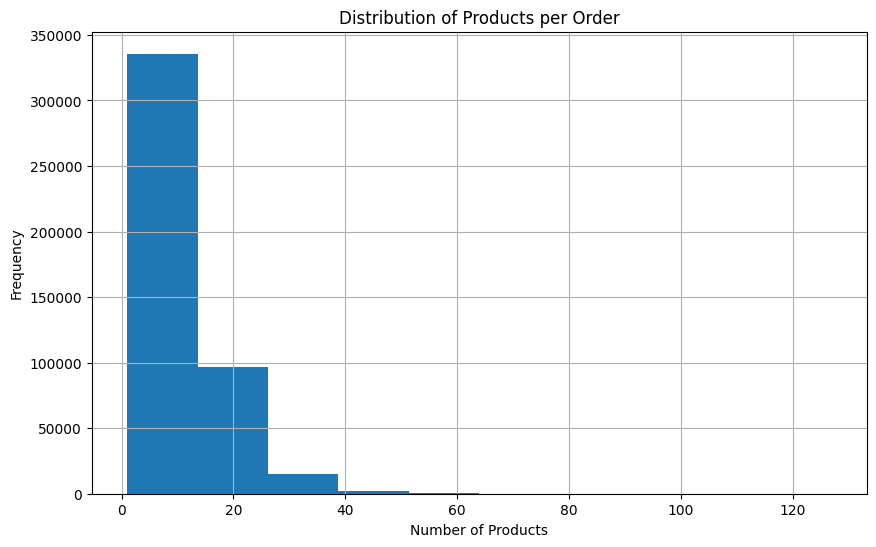

In [49]:
avg_items.plot(kind='hist',
               figsize=(10, 6),
               grid=True,
               title='Distribution of Products per Order',
               xlabel='Number of Products')

<div class="alert alert-info"> Observation: Customers typically order less than 20 products per order</div>

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [50]:
# merge order_products and products on 'product_id'
product_id_merged = order_products.merge(products, on='product_id')

display(product_id_merged.head())
print()
product_id_merged.info()
print()
print(type(product_id_merged))

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prod_lower
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1,chicken breast tenders breaded
1,147172,11440,7,1,Chicken Breast Tenders Breaded,129,1,chicken breast tenders breaded
2,3341719,11440,4,1,Chicken Breast Tenders Breaded,129,1,chicken breast tenders breaded
3,1938779,11440,8,1,Chicken Breast Tenders Breaded,129,1,chicken breast tenders breaded
4,1728338,11440,23,0,Chicken Breast Tenders Breaded,129,1,chicken breast tenders breaded



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int32 
 3   reordered          int64 
 4   product_name       object
 5   aisle_id           int64 
 6   department_id      int64 
 7   prod_lower         object
dtypes: int32(1), int64(5), object(2)
memory usage: 260.1+ MB

<class 'pandas.core.frame.DataFrame'>


In [51]:
# group the table by product_id and product_name and sum the reordered column.
reordered_sum = product_id_merged.groupby(['product_id', 'product_name'])[
    'reordered'].sum().reset_index()
reordered_sum.columns = ['product_id', 'product_name', 'num_reorders']

In [52]:
# sort the reordered_sum by 'num_reorders' desc and print
reordered_sum = reordered_sum.sort_values(by='num_reorders', ascending=False)
display(reordered_sum.head(20))

,product_id,product_name,num_reorders
22808,24852,Banana,55763
12025,13176,Bag of Organic Bananas,44450
19370,21137,Organic Strawberries,28639
20077,21903,Organic Baby Spinach,26233
43271,47209,Organic Hass Avocado,23629
43788,47766,Organic Avocado,18743
25556,27845,Organic Whole Milk,16251
43663,47626,Large Lemon,15044
25666,27966,Organic Raspberries,14748
15364,16797,Strawberries,13945


<div class="alert alert-info">  Observation: Most popular products are fresh produce</div>

### [C3] For each product, what proportion of its orders are reorders?

In [53]:
# create a pivot table to count the order per product_id
order_pivot = order_products.pivot_table(index='product_id',
                                         values='order_id',
                                         aggfunc='count')
# rename column of pivot
order_pivot.columns = ['num_order']

# see result of table
display(order_pivot)

,num_order
product_id,
1,280
2,11
3,42
4,49
7,2
...,...
49690,5
49691,72
49692,12


In [54]:
# group the order_products file by product_id and count the number of reorders (order_id)
reorder_pivot = order_products.pivot_table(index='product_id',
                                           values='reordered',
                                           aggfunc='sum')
display(reorder_pivot)

,reordered
product_id,
1,158
2,0
3,31
4,25
7,1
...,...
49690,4
49691,31
49692,5


In [55]:
# merge two pivots and add a column that calculates the proportion of reorder
reor_rate = pd.merge(order_pivot, reorder_pivot, on='product_id')
reor_rate['reorder_rate'] = reor_rate['reordered']/reor_rate['num_order']
display(reor_rate)

,num_order,reordered,reorder_rate
product_id,,,
1,280,158,0.564286
2,11,0,0.000000
3,42,31,0.738095
4,49,25,0.510204
7,2,1,0.500000
...,...,...,...
49690,5,4,0.800000
49691,72,31,0.430556
49692,12,5,0.416667


### [C4] For each customer, what proportion of their products ordered are reorders?

In [56]:
# merge orders and order_products

orders_products = orders.merge(order_products, on='order_id')

# create a pivot to count number of orders
orders_products_pivot = orders_products.pivot_table(index='user_id',
                                                    values='order_id',
                                                    aggfunc='count')
# rename column of pivot
orders_products_pivot = orders_products_pivot.rename(
    columns={"order_id": "num_order"})

display(orders_products_pivot)

,num_order
user_id,
2,26
4,2
5,12
6,4
7,14
...,...
206203,27
206206,21
206207,46


In [57]:
# create pivot table to count the number of reorders per user
reorders_product_pivot = orders_products.pivot_table(index='user_id',
                                                     values='reordered',
                                                     aggfunc='sum')
# merge the two pivot tables
user_reor_rate = pd.merge(orders_products_pivot,
                          reorders_product_pivot, on='user_id')
user_reor_rate['reorder_rate'] = user_reor_rate['reordered'] / \
    user_reor_rate['num_order']

display(user_reor_rate)

,num_order,reordered,reorder_rate
user_id,,,
2,26,1,0.038462
4,2,0,0.000000
5,12,8,0.666667
6,4,0,0.000000
7,14,13,0.928571
...,...,...,...
206203,27,6,0.222222
206206,21,15,0.714286
206207,46,41,0.891304


### [C5] What are the top 20 items that people put in their carts first? 

In [58]:
# Because we filled in missing values of add_to_cart_order in 2.3, we have re-import the original data
order_products = pd.read_csv('FileLoction/order_products.csv', sep=';')

# Check for fullly duplicate rows
print("Duplicates in order_products:", order_products.duplicated().sum())
print()  # for better readability

# Double check for any other tricky duplicates
print(order_products[order_products.duplicated(
    subset=['order_id', 'product_id'], keep=False)])
print()  # for better readability

# Merge the data with products table in order to get product name as well as product_id for top 20 products added to cart
order_products_products = products.merge(order_products, on='product_id')
display(order_products_products.head())

Duplicates in order_products: 0

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []



,product_id,product_name,aisle_id,department_id,prod_lower,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies,1104373,11.0,1
1,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies,1774977,4.0,1
2,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies,652770,10.0,0
3,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies,1000035,6.0,1
4,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies,1679949,9.0,0


In [59]:
# group the data by product_id and product_name. Then count the number of times it was added to cart
group_by_Prod = order_products_products.groupby(['product_id', 'product_name'])[
    'add_to_cart_order'].sum().reset_index()

# rename count of add_to_cart_order to num_ATC (number of times added to cart)
group_by_Prod = group_by_Prod.rename(columns={"add_to_cart_order": "num_ATC"})

In [60]:
# sort the group_by_Prod to identify top 20 proucts that are added to the cart by product_id
group_by_Prod_sorted = group_by_Prod.sort_values(by='num_ATC', ascending=False)
display(group_by_Prod_sorted.head(20))

,product_id,product_name,num_ATC
22808,24852,Banana,321962.0
12025,13176,Bag of Organic Bananas,271774.0
19370,21137,Organic Strawberries,268494.0
20077,21903,Organic Baby Spinach,254234.0
43271,47209,Organic Hass Avocado,201977.0
43663,47626,Large Lemon,171731.0
24047,26209,Limes,170864.0
43788,47766,Organic Avocado,160678.0
15364,16797,Strawberries,141625.0
25666,27966,Organic Raspberries,138046.0



<div class="alert alert-info"></b>

Assumption: 0 = Sunday and 6 = Saturday

Analaysis:
1. Most of the shopping is done between 10AM - 3PM. This may vary between day of the week, but peak shopping hour of Wednesday and Saturday still shows this is true.
2. Sundays are the most popular for grocery shopping. And the second most popular day of the week is Monday.
3. On average people wait 11 days until they order their next groceries. Median is 7 and mode is 30 days.
4. Most customers do not order more than 5 times, which signifies traction issue.
5. Top 3 most popular items ordered: Banana, Bag of Organic Bananas, Organic Strawberries. Furthermore, all top 20 most popular items are produce. 
6. Customers typically order less than 20 items per order
7. Top 3 most popular items that are reordered are same as the top 3 most popular items ordered. Further more, top 20 reordered items are also produce. 
8. Top 3 most popular items added to cart are also same as the top 3 most popular items ordered. Further more, top 20 items are also produce. 

Recomendations:
1. Since most popular day to shop is Sunday, recommended day/time frame of promotions and marketing campaign is Saturday - Sunday. Recommended timeframe is 9 AM - 4 PM. 
2. It's recommended that we reach out to customers on a weekly basis based on the median wait time until the next order.
3. Recommendation is to learn why customers stop ordering after 5 orders. (e.g. do we give promotion only upto first 5 orders?, Do they discover quality issues with groceries they receive?)
4. To increase the number of items ordered per order, we recommend shipping perks when customers order more than 20 items.
5. Top 3 most popular overall Banana, Bagas of Organic Bananas, and Organic Strawberries. Further more, top 20 most popular item overall is shown to be produce. Hence, it'll be recommended to focus our quality on produce.
    
</div>